In [11]:
!pip install yfinance --quiet

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
stock = yf.download("AAPL", start="2020-01-01", end="2023-12-31")

print(stock.shape)
stock.head()


/tmp/ipython-input-2673260796.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

(1006, 5)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307503,73.609737,71.849525,71.849525,132079200


In [14]:
stock["Next_Close"] = stock["Close"].shift(-1)

stock.dropna(inplace=True)

X = stock[["Open", "High", "Low", "Volume"]]
y = stock["Next_Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [18]:
print("📈 Linear Regression :", r2_score(y_test, y_pred_lr))
print("📉 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

print("📈 Random Forest :", r2_score(y_test, y_pred_rf))
print("📉 RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

📈 Linear Regression : 0.9579012579816497
📉 RMSE: 2.2307169308361816
📈 Random Forest : 0.08388874827810311
📉 RMSE: 10.406004583169159


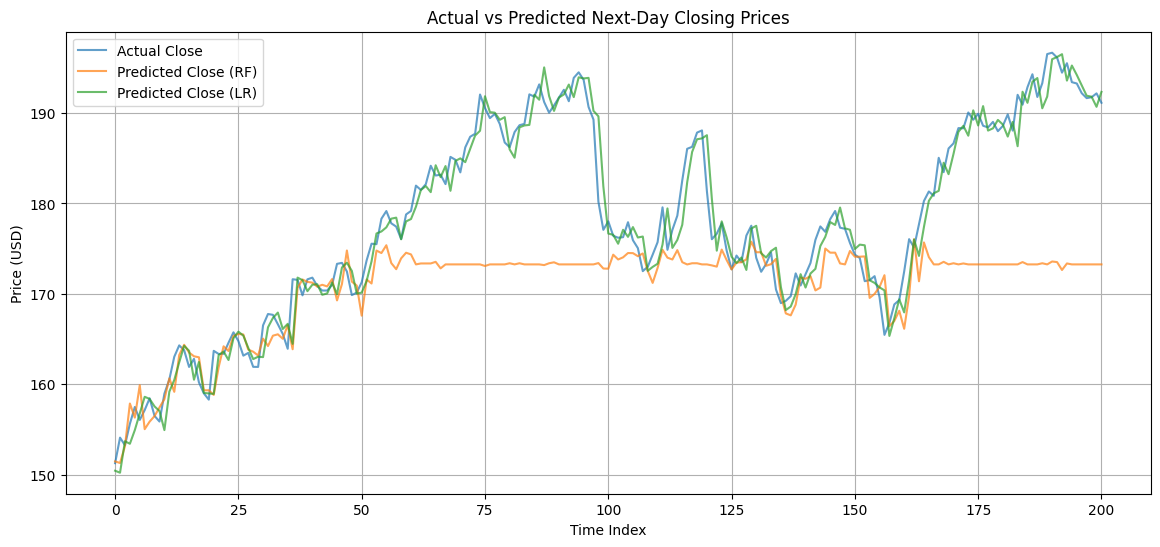

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Actual Close", alpha=0.7)
plt.plot(y_pred_rf, label="Predicted Close (RF)", alpha=0.7)
plt.plot(y_pred_lr, label="Predicted Close (LR)", alpha=0.7)
plt.title("Actual vs Predicted Next-Day Closing Prices")
plt.xlabel("Time Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()